<a href="https://colab.research.google.com/github/lokkyX3/GFG/blob/main/GFG_twl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

plt.style.use('seaborn')

In [ ]:
drive.mount('/content/drive')

In [3]:
#Conversion Rate
def cr(orders, visits):
  return orders/visits*100

#Average Basket Size
def abs(revenue, orders):
  return revenue/orders

#Cost to Income Ratio
def cir(spend, revenue):
  return spend/revenue

In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GFG/GFG_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  18 non-null     object
 1   Paid/Free     18 non-null     object
 2   Spend_$       18 non-null     int64 
 3   Visits        18 non-null     int64 
 4   Orders        18 non-null     int64 
 5   Revenue_$     18 non-null     int64 
 6   Week          18 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.1+ KB


In [6]:
df['Week'] = df['Week'].astype('category')

# What Happened?
Let take a quick look into overall figures for each channel type. The channel are categorized into:


*   App
*   Web
*   Newsletter
*   PR



In [7]:
df.loc[df['Channel_name'].str.contains('App'),'channel_type'] = 'App'
df.loc[df['Channel_name'].str.contains('Web'),'channel_type'] = 'Web'
df.loc[df['Channel_name'].str.contains('Newsletter'),'channel_type'] = 'Newsletter'
df.loc[df['Channel_name'].str.contains('PR'),'channel_type'] = 'PR'

In [8]:
overall_channel = df.groupby(by=['channel_type']).sum().reset_index()

In [9]:
overall_channel['cr'] = cr(overall_channel['Orders'],overall_channel['Visits'])
overall_channel['abs'] = abs(overall_channel['Revenue_$'],overall_channel['Orders'])
overall_channel['cir'] = cir(overall_channel['Spend_$'],overall_channel['Revenue_$'])

[Text(0.5, 0, '')]

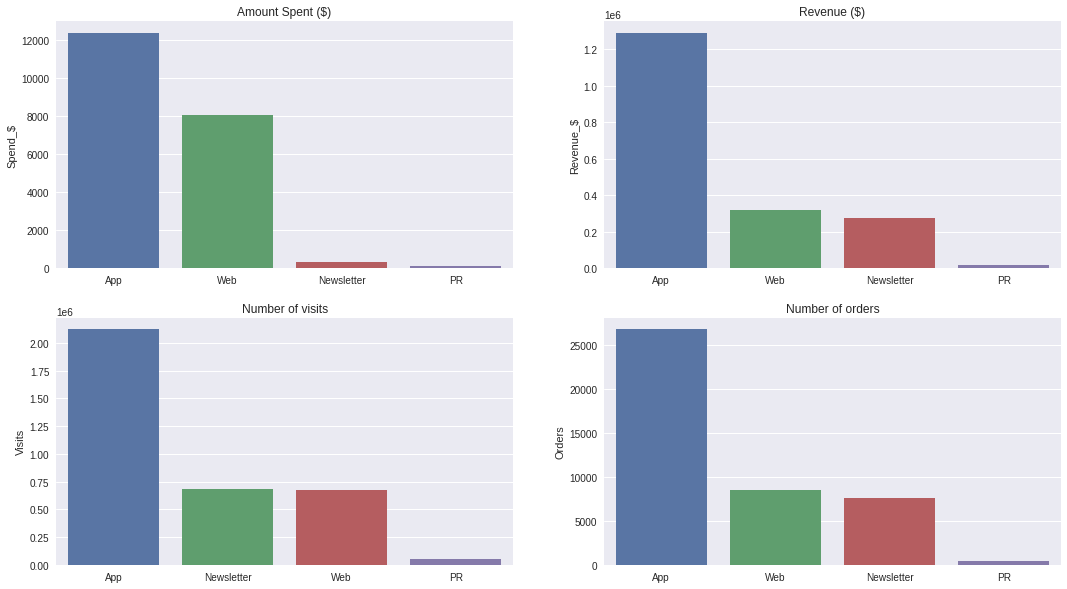

In [ ]:
#@title
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
#Spend
sns.barplot(ax=axes[0,0],x='channel_type',y='Spend_$',data=overall_channel.sort_values('Spend_$',ascending=False))
axes[0,0].set_title('Amount Spent ($)')
axes[0,0].set(xlabel=None)

#Revenue
sns.barplot(ax=axes[0,1],x='channel_type',y='Revenue_$',data=overall_channel.sort_values('Revenue_$',ascending=False))
axes[0,1].set_title('Revenue ($)')
axes[0,1].set(xlabel=None)

#Visits
sns.barplot(ax=axes[1,0],x='channel_type',y='Visits',data=overall_channel.sort_values('Visits',ascending=False))
axes[1,0].set_title('Number of visits')
axes[1,0].set(xlabel=None)

#Orders
sns.barplot(ax=axes[1,1],x='channel_type',y='Orders',data=overall_channel.sort_values('Orders',ascending=False))
axes[1,1].set_title('Number of orders')
axes[1,1].set(xlabel=None)

From a quick glance, most effforts and resources were put into Apps followed by Web, Newsletter and PR. The revenue and orders of the channel seems in tally to that as well. The numbers of visitors are dominated by App and with PR as the lowest among the four. 

#Week 43 vs Week 42

Percentage difference between Week 43 and Week 42



In [ ]:
df_42 = df[df['Week']==42].groupby(by=['channel_type']).sum()
df_43 = df[df['Week']==43].groupby(by=['channel_type']).sum()

In [ ]:
df_diff = df_43-df_42
df_diff.reset_index()
df_p = df_diff/(df_42)*100
df_p

,Spend_$,Visits,Orders,Revenue_$
channel_type,,,,
App,-57.114830,-15.652174,10.392157,-6.372273
Newsletter,-10.638298,20.322581,24.193548,14.283248
PR,-27.631579,0.000000,-10.000000,-20.000000
Web,18.668831,-22.105263,-23.180873,-12.546858


[Text(0, 0.5, ''), Text(0.5, 0, '')]

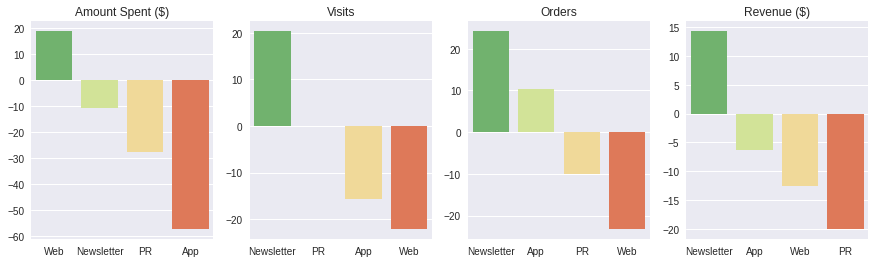

In [ ]:
#@title
fig, axes = plt.subplots(1,4, figsize=(15, 4),sharex = False)

#Spend
sns.barplot(ax=axes[0],x='channel_type',y='Spend_$',data=df_p.sort_values('Spend_$',ascending=False).reset_index(),palette='RdYlGn_r')
axes[0].set_title('Amount Spent ($)')
axes[0].set(xlabel=None,ylabel=None)

#Spend
sns.barplot(ax=axes[1],x='channel_type',y='Visits',data=df_p.sort_values('Visits',ascending=False).reset_index(),palette='RdYlGn_r')
axes[1].set_title('Visits')
axes[1].set(xlabel=None,ylabel=None)

#Spend
sns.barplot(ax=axes[2],x='channel_type',y='Orders',data=df_p.sort_values('Orders',ascending=False).reset_index(),palette='RdYlGn_r')
axes[2].set_title('Orders')
axes[2].set(xlabel=None,ylabel=None)

#Spend
sns.barplot(ax=axes[3],x='channel_type',y='Revenue_$',data=df_p.sort_values('Revenue_$',ascending=False).reset_index(),palette='RdYlGn_r')
axes[3].set_title('Revenue ($)')
axes[3].set(xlabel=None,ylabel=None)

App revenue shows a decrease (-6.37%) in revenue and visits (-15.65%) despite that the orders increases (10.39%).
However, Newsletter channel show an noticable increase in revenue,  orders and visits eventhough the spending have been reduced.Also note that, Web channel had a plunge in its visits, orders and revenue eventhough spendings were increased (18.67%) compared to previous week.

# Overall Performance

In [10]:
overall_channel[['channel_type','cr','abs','cir']]

,channel_type,cr,abs,cir
0,App,1.265330,48.056850,0.009604
1,Newsletter,1.119327,35.725180,0.001303
2,PR,0.950000,37.515789,0.007351
3,Web,1.258136,37.511346,0.025333


Text(0.5, 1.0, 'Cost to Income Ratio ($)')

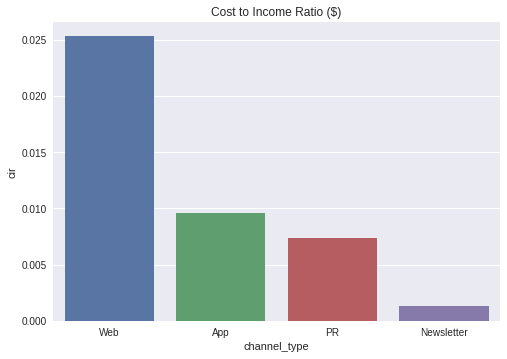

In [ ]:
sns.barplot(x='channel_type',y='cir',data=overall_channel.sort_values('cir',ascending=False)).set_title('Cost to Income Ratio ($)')

Text(0.5, 1.0, 'Average Basket Size ($)')

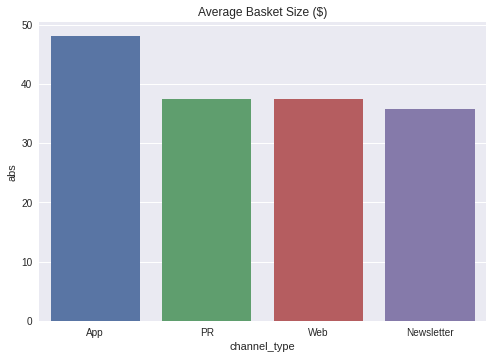

In [ ]:
sns.barplot(x='channel_type',y='abs',data=overall_channel.sort_values('abs',ascending=False)).set_title('Average Basket Size ($)')

Text(0.5, 1.0, 'Conversion Rate (%)')

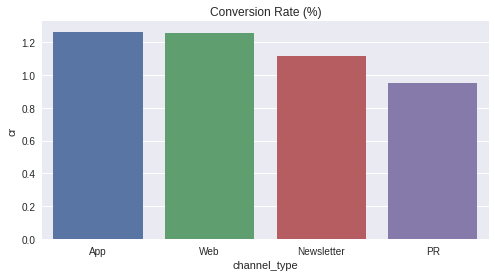

In [ ]:
sns.barplot(x='channel_type',y='cr',data=overall_channel.sort_values('cr',ascending=False)).set_title('Conversion Rate (%)')

Lets take a look at the performance metrics of these channels. 

**Conversion rate (CR)**
> App has the highest CR leading with a 1.27% while PR has the lowest CR of 0.95%. Web and Newsletter are placed at 2nd and 3rd repectively.

**Average Basket Size (ABS)**
> Again, App top the ranking with ABS of 48.06. Both PR and Web performed closely with ABS of 37.52 and 37.51 respectively.

**Cost to Income Ration (CIR)**
> In terms of CIR, Newsletter has the lowest CIR followed by PR, App and Web.

**Which channel performed better these 2 week?**
> By looking at CR and ABS as criteria, App without a doubt would be the best performing channel. Eventhough the CIR of App are the 3rd highest, it is offset by having highest amount of visitor and a high conversion rate.
The second best performer would be Newsletter although it does not have the highest CR and ABS. But it has the lowest CIR among the channel would offset the small difference of performance in terms of CR and ABS when compared to Web and PR.


